In [1]:
import requests
from dotenv import load_dotenv
import os 
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
# from MCForecastTools import MCSimulation
import json
import matplotlib.pyplot as plt
from pathlib import Path

load_dotenv()

True

In [2]:
# Set file path
file_path = Path("S&P500.csv")

# Create dataframe
sp500_df = pd.read_csv(file_path)

In [3]:
sp500_df = sp500_df.set_index("Date")
sp500_df.index = pd.to_datetime(sp500_df.index, infer_datetime_format=True).tz_localize('America/New_York')
sp500_df.index = sp500_df.index.normalize()
sp500_df

,Close
Date,
2016-01-14 00:00:00-05:00,1921.84
2016-01-15 00:00:00-05:00,1880.33
2016-01-19 00:00:00-05:00,1881.33
2016-01-20 00:00:00-05:00,1859.33
2016-01-21 00:00:00-05:00,1868.99
...,...
2021-01-07 00:00:00-05:00,3803.79
2021-01-08 00:00:00-05:00,3824.68
2021-01-11 00:00:00-05:00,3799.61


In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version= "v2")


In [5]:
start_date = pd.Timestamp("2016-01-14", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-14", tz="America/New_York").isoformat()

tickers = ["AAPL", "TSLA", "AMZN", "DIS", "FB", "GOOGL", "GE", "NIO", "F", "MSFT", "QEP"]


timeframe = "1D"

In [6]:
def get_data(ticker):
    df = alpaca.get_barset(
        ticker,
        timeframe,
        start = start_date,
        end = end_date
    ).df

    return df


In [7]:
def get_columns(dataframe):
    dataframe = dataframe.T.reset_index(drop = True).T
    dataframe = dataframe.rename(columns={3:"close"})
    dataframe = dataframe.loc[:,["close"]]

    return dataframe

In [8]:
def calc_data(dataframe):
    dataframe["pct_change"] = dataframe["close"].pct_change()
    dataframe["volatility"] = np.std(dataframe["pct_change"])

    return dataframe


In [9]:
#df_spy = get_data("SPY")
#df_spy = get_columns(df_spy)
#df_spy = calc_data(df_spy)
#df_spy.head()

In [10]:
#df_spy.close.plot()

In [11]:
df_aapl = get_data("AAPL")
df_aapl = get_columns(df_aapl)
df_aapl = calc_data(df_aapl)
df_aapl.head()

,close,pct_change,volatility
time,,,
2016-01-14 00:00:00-05:00,99.51,NaN,0.028297
2016-01-15 00:00:00-05:00,97.09,-0.024319,0.028297
2016-01-19 00:00:00-05:00,96.68,-0.004223,0.028297
2016-01-20 00:00:00-05:00,96.81,0.001345,0.028297
2016-01-21 00:00:00-05:00,96.26,-0.005681,0.028297


In [12]:
df_aapl_1 = df_aapl.loc[:"20200828"]
df_aapl_1["close"] = (df_aapl_1["close"]/2)
df_aapl_1.head()

,close,pct_change,volatility
time,,,
2016-01-14 00:00:00-05:00,49.755,NaN,0.028297
2016-01-15 00:00:00-05:00,48.545,-0.024319,0.028297
2016-01-19 00:00:00-05:00,48.340,-0.004223,0.028297
2016-01-20 00:00:00-05:00,48.405,0.001345,0.028297
2016-01-21 00:00:00-05:00,48.130,-0.005681,0.028297


In [13]:
df_apple_2 = df_aapl.loc["20200829":]
df_apple_2.head()

,close,pct_change,volatility
time,,,
2020-08-31 00:00:00-04:00,128.85,-0.741696,0.028297
2020-09-01 00:00:00-04:00,134.20,0.041521,0.028297
2020-09-02 00:00:00-04:00,131.22,-0.022206,0.028297
2020-09-03 00:00:00-04:00,120.92,-0.078494,0.028297
2020-09-04 00:00:00-04:00,120.90,-0.000165,0.028297


In [14]:
df_aapl = pd.concat([df_aapl_1, df_apple_2])
df_aapl

,close,pct_change,volatility
time,,,
2016-01-14 00:00:00-05:00,49.7550,NaN,0.028297
2016-01-15 00:00:00-05:00,48.5450,-0.024319,0.028297
2016-01-19 00:00:00-05:00,48.3400,-0.004223,0.028297
2016-01-20 00:00:00-05:00,48.4050,0.001345,0.028297
2016-01-21 00:00:00-05:00,48.1300,-0.005681,0.028297
...,...,...,...
2021-01-08 00:00:00-05:00,131.9900,0.008712,0.028297
2021-01-11 00:00:00-05:00,128.9800,-0.022805,0.028297
2021-01-12 00:00:00-05:00,128.8199,-0.001241,0.028297


In [15]:
df_tsla = get_data("TSLA")
df_tsla = get_columns(df_tsla)
df_tsla = calc_data(df_tsla)
df_tsla.head()

,close,pct_change,volatility
time,,,
2016-01-14 00:00:00-05:00,206.18,NaN,0.042411
2016-01-15 00:00:00-05:00,204.98,-0.005820,0.042411
2016-01-19 00:00:00-05:00,204.71,-0.001317,0.042411
2016-01-20 00:00:00-05:00,198.70,-0.029359,0.042411
2016-01-21 00:00:00-05:00,199.97,0.006392,0.042411


In [16]:
df_tsla_1 = df_tsla.loc[:"20200828"]
df_tsla_1["close"] = (df_tsla_1["close"]/5)
df_tsla_1.head(20)

,close,pct_change,volatility
time,,,
2016-01-14 00:00:00-05:00,41.236,NaN,0.042411
2016-01-15 00:00:00-05:00,40.996,-0.005820,0.042411
2016-01-19 00:00:00-05:00,40.942,-0.001317,0.042411
2016-01-20 00:00:00-05:00,39.740,-0.029359,0.042411
2016-01-21 00:00:00-05:00,39.994,0.006392,0.042411
2016-01-22 00:00:00-05:00,40.510,0.012902,0.042411
2016-01-25 00:00:00-05:00,39.274,-0.030511,0.042411
2016-01-26 00:00:00-05:00,38.712,-0.014310,0.042411
2016-01-27 00:00:00-05:00,37.614,-0.028363,0.042411


In [17]:
df_tsla_2 = df_tsla.loc["20200829":]
df_tsla_2.head()

,close,pct_change,volatility
time,,,
2020-08-31 00:00:00-04:00,498.5100,-0.774789,0.042411
2020-09-01 00:00:00-04:00,475.0400,-0.047080,0.042411
2020-09-02 00:00:00-04:00,447.2450,-0.058511,0.042411
2020-09-03 00:00:00-04:00,407.0000,-0.089984,0.042411
2020-09-04 00:00:00-04:00,417.9307,0.026857,0.042411


In [18]:
df_tsla = pd.concat([df_tsla_1, df_tsla_2])
df_tsla

,close,pct_change,volatility
time,,,
2016-01-14 00:00:00-05:00,41.236,NaN,0.042411
2016-01-15 00:00:00-05:00,40.996,-0.005820,0.042411
2016-01-19 00:00:00-05:00,40.942,-0.001317,0.042411
2016-01-20 00:00:00-05:00,39.740,-0.029359,0.042411
2016-01-21 00:00:00-05:00,39.994,0.006392,0.042411
...,...,...,...
2021-01-08 00:00:00-05:00,880.030,0.078151,0.042411
2021-01-11 00:00:00-05:00,811.180,-0.078236,0.042411
2021-01-12 00:00:00-05:00,849.220,0.046895,0.042411


In [19]:
df_dis = get_data("DIS")
df_dis = get_columns(df_dis)
df_dis = calc_data(df_dis)
df_dis.head()

,close,pct_change,volatility
time,,,
2016-01-14 00:00:00-05:00,99.07,NaN,0.019447
2016-01-15 00:00:00-05:00,93.89,-0.052286,0.019447
2016-01-19 00:00:00-05:00,93.95,0.000639,0.019447
2016-01-20 00:00:00-05:00,89.77,-0.044492,0.019447
2016-01-21 00:00:00-05:00,94.02,0.047343,0.019447


In [20]:
df_fb = get_data("FB")
df_fb = get_columns(df_fb)
df_fb = calc_data(df_fb)
df_fb.head()

,close,pct_change,volatility
time,,,
2016-01-14 00:00:00-05:00,98.35,NaN,0.020803
2016-01-15 00:00:00-05:00,94.99,-0.034164,0.020803
2016-01-19 00:00:00-05:00,95.26,0.002842,0.020803
2016-01-20 00:00:00-05:00,94.37,-0.009343,0.020803
2016-01-21 00:00:00-05:00,94.16,-0.002225,0.020803


In [21]:
df_googl = get_data("GOOGL")
df_googl = get_columns(df_googl)
df_googl = calc_data(df_googl)
df_googl.head()

,close,pct_change,volatility
time,,,
2016-01-14 00:00:00-05:00,731.29,NaN,0.016571
2016-01-15 00:00:00-05:00,710.45,-0.028498,0.016571
2016-01-19 00:00:00-05:00,719.02,0.012063,0.016571
2016-01-20 00:00:00-05:00,718.56,-0.000640,0.016571
2016-01-21 00:00:00-05:00,726.67,0.011286,0.016571


In [22]:
df_ge = get_data("GE")
df_ge = get_columns(df_ge)
df_ge = calc_data(df_ge)
df_ge.head()

,close,pct_change,volatility
time,,,
2016-01-14 00:00:00-05:00,29.04,NaN,0.025104
2016-01-15 00:00:00-05:00,28.48,-0.019284,0.025104
2016-01-19 00:00:00-05:00,28.48,0.000000,0.025104
2016-01-20 00:00:00-05:00,27.99,-0.017205,0.025104
2016-01-21 00:00:00-05:00,28.57,0.020722,0.025104


In [23]:
df_nio = get_data("NIO")
df_nio = get_columns(df_nio)
df_nio = calc_data(df_nio)
df_nio.head()

,close,pct_change,volatility
time,,,
2016-01-14 00:00:00-05:00,14.42,NaN,0.070833
2016-01-15 00:00:00-05:00,14.44,0.001387,0.070833
2016-01-19 00:00:00-05:00,14.44,0.000000,0.070833
2016-01-20 00:00:00-05:00,14.30,-0.009695,0.070833
2016-01-21 00:00:00-05:00,14.37,0.004895,0.070833


In [24]:
df_f = get_data("F")
df_f = get_columns(df_f)
df_f = calc_data(df_f)
df_f.head()

,close,pct_change,volatility
time,,,
2016-01-14 00:00:00-05:00,12.2000,NaN,0.021261
2016-01-15 00:00:00-05:00,11.9700,-0.018852,0.021261
2016-01-19 00:00:00-05:00,11.9600,-0.000835,0.021261
2016-01-20 00:00:00-05:00,11.8915,-0.005727,0.021261
2016-01-21 00:00:00-05:00,12.0000,0.009124,0.021261


In [25]:
df_msft = get_data("MSFT")
df_msft = get_columns(df_msft)
df_msft = calc_data(df_msft)
df_msft.head()

,close,pct_change,volatility
time,,,
2016-01-14 00:00:00-05:00,53.06,NaN,0.017496
2016-01-15 00:00:00-05:00,50.98,-0.039201,0.017496
2016-01-19 00:00:00-05:00,50.56,-0.008239,0.017496
2016-01-20 00:00:00-05:00,50.78,0.004351,0.017496
2016-01-21 00:00:00-05:00,50.45,-0.006499,0.017496


In [26]:
df_amzn = get_data("AMZN")
df_amzn = get_columns(df_amzn)
df_amzn = calc_data(df_amzn)
df_amzn.head()

,close,pct_change,volatility
time,,,
2016-01-14 00:00:00-05:00,593.00,NaN,0.019095
2016-01-15 00:00:00-05:00,570.00,-0.038786,0.019095
2016-01-19 00:00:00-05:00,574.48,0.007860,0.019095
2016-01-20 00:00:00-05:00,571.59,-0.005031,0.019095
2016-01-21 00:00:00-05:00,574.95,0.005878,0.019095


In [27]:
df_qep = get_data("QEP")
df_qep = get_columns(df_qep)
df_qep = calc_data(df_qep)
df_qep.head()

,close,pct_change,volatility
time,,,
2016-01-14 00:00:00-05:00,11.18,NaN,0.059442
2016-01-15 00:00:00-05:00,10.59,-0.052773,0.059442
2016-01-19 00:00:00-05:00,9.43,-0.109537,0.059442
2016-01-20 00:00:00-05:00,9.28,-0.015907,0.059442
2016-01-21 00:00:00-05:00,10.03,0.080819,0.059442


In [28]:
#df_list = []
#for t in tickers:
    #df = get_data(t)
    #df = get_columns(df)
    #df = calc_data(df)
    #df_list.append(df)

In [29]:
big_df = pd.concat([sp500_df, df_aapl.close, df_tsla.close, df_amzn.close, df_dis.close, df_fb.close, df_googl.close, df_ge.close, df_nio.close, df_f.close, df_msft.close, df_qep.close], axis = 1)

In [30]:
big_df.head()

,Close,close,close,close,close,close,close,close,close,close,close,close
2016-01-14 00:00:00-05:00,1921.84,49.755,41.236,593.00,99.07,98.35,731.29,29.04,14.42,12.2000,53.06,11.18
2016-01-15 00:00:00-05:00,1880.33,48.545,40.996,570.00,93.89,94.99,710.45,28.48,14.44,11.9700,50.98,10.59
2016-01-19 00:00:00-05:00,1881.33,48.340,40.942,574.48,93.95,95.26,719.02,28.48,14.44,11.9600,50.56,9.43
2016-01-20 00:00:00-05:00,1859.33,48.405,39.740,571.59,89.77,94.37,718.56,27.99,14.30,11.8915,50.78,9.28
2016-01-21 00:00:00-05:00,1868.99,48.130,39.994,574.95,94.02,94.16,726.67,28.57,14.37,12.0000,50.45,10.03


In [31]:
big_df.columns = ["SP500", "AAPL", "TSLA", "AMZN", "DIS", "FB", "GOOGL", "GE", "NIO", "F", "MSFT", "QEP"]

In [32]:
big_df.tail(20)

,SP500,AAPL,TSLA,AMZN,DIS,FB,GOOGL,GE,NIO,F,MSFT,QEP
2020-12-16 00:00:00-05:00,3701.17,127.7500,622.670,3240.960,173.14,275.70,1757.10,10.920,44.6700,9.0400,219.19,2.350
2020-12-17 00:00:00-05:00,3722.48,128.6500,655.725,3237.015,173.51,274.48,1740.52,10.890,46.0250,9.0800,219.42,2.370
2020-12-18 00:00:00-05:00,3709.41,126.6500,664.990,3201.070,173.39,276.15,1720.03,10.790,46.5430,8.9600,218.15,2.310
2020-12-21 00:00:00-05:00,3694.92,128.2400,649.780,3205.740,170.68,272.95,1734.56,10.760,48.9800,8.9299,222.57,2.230
2020-12-22 00:00:00-05:00,3687.26,131.8450,640.090,3206.520,170.46,267.17,1720.23,10.610,47.6000,8.7978,223.97,2.160
2020-12-23 00:00:00-05:00,3690.01,130.9600,645.980,3186.730,173.47,268.05,1727.40,10.860,47.0100,8.9800,221.02,2.370
2020-12-24 00:00:00-05:00,3703.06,131.9900,661.660,3171.160,173.68,267.32,1734.75,10.650,45.7700,8.8550,222.71,2.400
2020-12-28 00:00:00-05:00,3735.36,136.7300,663.770,3283.960,178.87,277.00,1774.12,10.640,44.0550,8.8850,224.96,2.370
2020-12-29 00:00:00-05:00,3727.04,134.9300,665.980,3320.710,177.43,276.78,1757.78,10.560,46.1100,8.8300,224.29,2.320
2020-12-30 00:00:00-05:00,3732.04,133.7200,694.710,3285.850,181.21,271.88,1736.24,10.715,48.3650,8.8600,221.68,2.420


In [33]:
daily_returns = big_df.pct_change().dropna()

In [34]:
stock_corr = daily_returns.corr()

[Text(0.5, 15.0, 'Stock'),
 Text(33.0, 0.5, 'Stock'),
 Text(0.5, 1.0, 'Stock Correlation')]

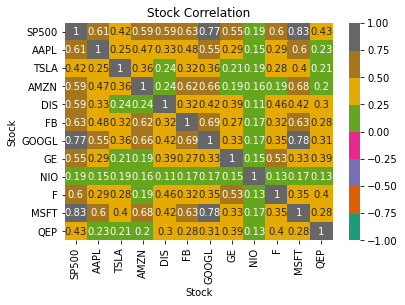

In [35]:
import seaborn as sns
stock_corr_plot = sns.heatmap(stock_corr, vmin = -1, vmax = 1, cmap = "Dark2", annot= True)
stock_corr_plot.set(
    xlabel = "Stock", 
    ylabel = "Stock",
    title = "Stock Correlation")

In [36]:
def calc_beta(df_column_1, df_column_2):
    covariance = df_column_1.cov(df_column_2)
    variance = df_column_2.var()
    beta = covariance/variance

    return beta

In [37]:
AAPL_beta = calc_beta(daily_returns['AAPL'], daily_returns['SP500'])
TSLA_beta = calc_beta(daily_returns['TSLA'], daily_returns['SP500'])
AMZN_beta = calc_beta(daily_returns['AMZN'], daily_returns['SP500'])
DIS_beta = calc_beta(daily_returns['DIS'], daily_returns['SP500'])
FB_beta = calc_beta(daily_returns['FB'], daily_returns['SP500'])
GOOGL_beta = calc_beta(daily_returns['GOOGL'], daily_returns['SP500'])
GE_beta = calc_beta(daily_returns['GE'], daily_returns['SP500'])
NIO_beta = calc_beta(daily_returns['NIO'], daily_returns['SP500'])
F_beta = calc_beta(daily_returns['F'], daily_returns['SP500'])
MSFT_beta = calc_beta(daily_returns['MSFT'], daily_returns['SP500'])
QEP_beta = calc_beta(daily_returns['QEP'], daily_returns['SP500'])

In [38]:
print(f'AAPL Beta: {AAPL_beta}')
print(f'TSLA Beta: {TSLA_beta}')
print(f'AMZN Beta: {AMZN_beta}')
print(f'DIS Beta: {DIS_beta}')
print(f'FB Beta: {FB_beta}')
print(f'GOOGL Beta: {GOOGL_beta}')
print(f'GE Beta: {GE_beta}')
print(f'NIO Beta: {NIO_beta}')
print(f'F Beta: {F_beta}')
print(f'MSFT Beta: {MSFT_beta}')
print(f'QEP Beta: {QEP_beta}')

AAPL Beta: 1.1902267545497425
TSLA Beta: 1.268455473499803
AMZN Beta: 0.9274428935173955
DIS Beta: 0.9451407866919823
FB Beta: 1.0809169926947293
GOOGL Beta: 1.0541892350936062
GE Beta: 1.1394899700604022
NIO Beta: 0.8209457307228213
F Beta: 1.0617279027597166
MSFT Beta: 1.2017144082299223
QEP Beta: 2.125960794947445


In [39]:
beta_list = {'Stock':["AAPL", "TSLA", "AMZN", "DIS", "FB", "GOOGL", "GE", "NIO", "F", "MSFT", "QEP"], 'Beta':[AAPL_beta,
TSLA_beta,
AMZN_beta,
DIS_beta,
FB_beta,
GOOGL_beta,
GE_beta,
NIO_beta,
F_beta,
MSFT_beta,
QEP_beta]}
beta_df = pd.DataFrame(data=beta_list).set_index('Stock')
beta_df

,Beta
Stock,
AAPL,1.190227
TSLA,1.268455
AMZN,0.927443
DIS,0.945141
FB,1.080917
GOOGL,1.054189
GE,1.139490
NIO,0.820946
F,1.061728


In [40]:
corr_df = daily_returns.corr(method="pearson")
corr_df

,SP500,AAPL,TSLA,AMZN,DIS,FB,GOOGL,GE,NIO,F,MSFT,QEP
SP500,1.000000,0.612600,0.419338,0.585723,0.586082,0.626831,0.767179,0.547382,0.194611,0.602213,0.828285,0.431475
AAPL,0.612600,1.000000,0.252467,0.472141,0.329986,0.475510,0.545587,0.291437,0.145042,0.287655,0.598979,0.228847
TSLA,0.419338,0.252467,1.000000,0.360207,0.237678,0.323564,0.363280,0.207105,0.192302,0.277040,0.400860,0.211181
AMZN,0.585723,0.472141,0.360207,1.000000,0.244019,0.620655,0.660051,0.189952,0.160207,0.190902,0.680127,0.204975
DIS,0.586082,0.329986,0.237678,0.244019,1.000000,0.315071,0.419088,0.387850,0.111218,0.464522,0.422958,0.301642
FB,0.626831,0.475510,0.323564,0.620655,0.315071,1.000000,0.694636,0.269767,0.168934,0.317131,0.630543,0.277449
GOOGL,0.767179,0.545587,0.363280,0.660051,0.419088,0.694636,1.000000,0.334527,0.173603,0.349723,0.781875,0.307557
GE,0.547382,0.291437,0.207105,0.189952,0.387850,0.269767,0.334527,1.000000,0.146843,0.526482,0.332575,0.390293
NIO,0.194611,0.145042,0.192302,0.160207,0.111218,0.168934,0.173603,0.146843,1.000000,0.134759,0.166837,0.126013
F,0.602213,0.287655,0.277040,0.190902,0.464522,0.317131,0.349723,0.526482,0.134759,1.000000,0.353566,0.401153


In [41]:
#from sklearn.preprocessing import MinMaxScaler

In [42]:
#scaler = MinMaxScaler()

#x = big_df.values
#x_scaled = MinMaxScaler().fit_transform(x)
#big_df_2 = pd.DataFrame(x_scaled, columns=["SPY", "AAPL", "TSLA", "AMZN", "FIT", "FB", "GOOGL", "GE", "NIO", "F", "MSFT"])
#big_df_2

In [43]:
#corr_list = []

In [44]:
#def r2(x_column, y_column):
    #corr_matrix = np.corrcoef(x_column, y_column)
    #corr_xy = corr_matrix[0,1]
    #r_sq = corr_xy**2

    #return r_sq